### 大样本的意义

当我们增加样本容量时，即使是最小的差异看起来也可能变得非常显著。 

为了说明这一点，请完成这个 notebook 和下面的测试题目。

首先，导入库和数据。

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` 在这个案例中，假设我们想要测试 `full_data` 中所有个体的平均身高是否等于67.60英寸或 **不等于** 67.60 英寸。  首先，通过下面的 **测试 1** 来确定这些案例的零假设和备择假设。

`2.` 人口平均身高是多？人口身高的标准差是多少？使用下面的代码创建一组样本数据。样本的平均身高是多少？模拟五个值的平均值的抽样分布，查看其形状并绘制一个直方图。这五次抽样的平均值的抽样分布的标准差是多少？回答下面的 **测试 2** ，确保你的答案是正确的。

In [ ]:
#1.
H0:μ=67.60
H1:μ≠67.60

In [23]:
#2.
sample1 = full_data.sample(5)

In [24]:
sample1

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [25]:
full_data['height'].mean()# Population mean

67.597486973079342

In [26]:
sample1.height.mean() # Sample mean

67.882342520490838

In [27]:
full_data['height'].std()

3.1194332065503421

In [28]:
sample1['height'].std()

2.8434965552901939

In [29]:
sample1.mean()

user_id          3928.200000
drinks_coffee       0.800000
height             67.882343
dtype: float64

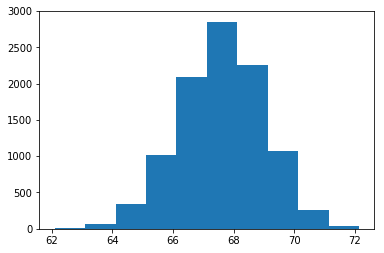

In [30]:
sampling_dist_mean5 = []

for _ in range(10000):
    sample1 = full_data.sample(5)
    sample_mean = sample1.height.mean()
    sampling_dist_mean5.append(sample_mean)
    
plt.hist(sampling_dist_mean5);

In [31]:
std_sampling_dist=np.std(sampling_dist_mean5)
std_sampling_dist

1.3873129885457822

`3.` 使用问题1中的零假设和备择假设以及问题2中抽样分布的结果，模拟你在零假设中的期望平均值。使用这些模拟值来确定一个p值，做出一个关于零假设和备择假设的决定。通过下面的 **测试 3** 和 **测试 4** 来检查你的解决方案。

**提示:**  [这里](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) 的 Numpy 文件可以帮你完成你的解决方案。

`4.` 现在，假设你从上面问题2中的样本中得到了相同的样本均值，但是样本数量是1000。对于这1000个值的平均值，你的抽样分布的新标准差是多少？此外，你的新p值是在你设定的零假设和备择假设之间选择的吗？模拟五个值的平均值的抽样分布，查看其形状并绘制一个直方图。在这里根据你的解决方案来回答下面的第二个到最后一个测试题目。

**提示：**  需要注意的是，如果遇到任何困难，你可以使用测试中的解决方案，尽早找到 p 值，只需稍作更改即可获得该答案。

`5.` 通过回答最后一个测试题目，回顾本节内容。

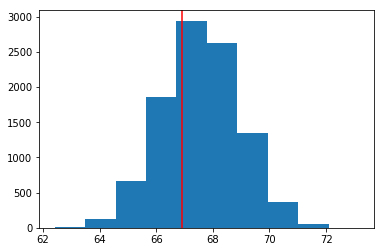

In [32]:
#3
null_mean = 67.60

means = []
for _ in range(10000):
    means.append(sample1)

null_vals = np.random.normal(null_mean, std_sampling_dist, 10000)

plt.hist(null_vals);
plt.axvline(x=sample1.height.mean(), color = 'red'); # where our sample mean falls on null dist

In [33]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample1.height.mean()

# probability of a statistic lower than observed
prob_more_extreme_low = (null_vals < obs_mean).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (null_mean + (null_mean - obs_mean) < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.61539999999999995

The above is a second possible method for obtaining the p-value. These are pretty different, stability of these values with such a small sample size is an issue. We are essentially shading outside the lines below.

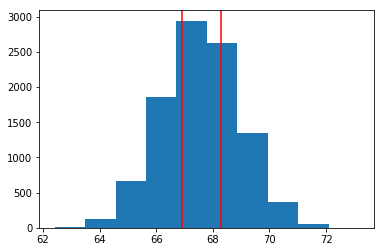

In [34]:
lower_bound = obs_mean
upper_bound = null_mean + (null_mean - obs_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

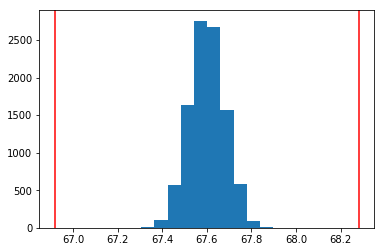

In [35]:
#4.
sampling_dist_mean1000 = []

for _ in range(10000):
    sample1 = full_data.sample(1000)
    sample_mean = sample1.height.mean()
    sampling_dist_mean1000.append(sample_mean)
    
std_sampling_dist1000 = np.std(sampling_dist_mean1000)    
null_vals = np.random.normal(null_mean, std_sampling_dist1000, 10000)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [36]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

# probability of a statistic lower than observed
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super close is still significant
      # when the sample size is large

0.0